In [95]:
from importlib import reload
# warnings.filterwarnings("ignore")
import functionsForProject
reload(functionsForProject)
from functionsForProject import *
from statsmodels.tsa.arima.model import ARIMA

In [22]:
df = pd.read_csv("Provisional_COVID-19_Deaths_by_Sex_and_Age_20240307.csv")
df['Start Date'] = pd.to_datetime(df['Start Date'])
total_df, year_df, month_df = split_dataframes(df)
show_max_deaths_in_month(month_df)


Max Deaths from Covid in a month of 105565 from: 2021-01-01 to 2021-01-31


In [23]:
df.head(1)

,Data As Of,Start Date,End Date,Group,Year,Month,State,Sex,Age Group,COVID-19 Deaths,Total Deaths,Pneumonia Deaths,Pneumonia and COVID-19 Deaths,Influenza Deaths,"Pneumonia, Influenza, or COVID-19 Deaths",Footnote
0,09/27/2023,2020-01-01,09/23/2023,By Total,NaN,NaN,United States,All Sexes,All Ages,1146774.0,12303399.0,1162844.0,569264.0,22229.0,1760095.0,NaN


In [24]:
empty_cells(total_df, year_df, month_df)

465
2753
36212


In [25]:
#Data Cleaning
total_df, year_df, month_df = clean_data(total_df, year_df, month_df)

In [26]:
empty_cells(total_df, year_df, month_df)

0
0
0


We then grouped the split datasets by Age Groups

In [54]:
month_age_df = month_df.groupby(['Age Group', 'Start Date'])['COVID-19 Deaths'].sum().reset_index()
year_age_df = year_df.groupby(['Age Group', 'Start Date'])['COVID-19 Deaths'].sum().reset_index()
total_age_df = total_df.groupby(['Age Group', 'Start Date'])['COVID-19 Deaths'].sum().reset_index()

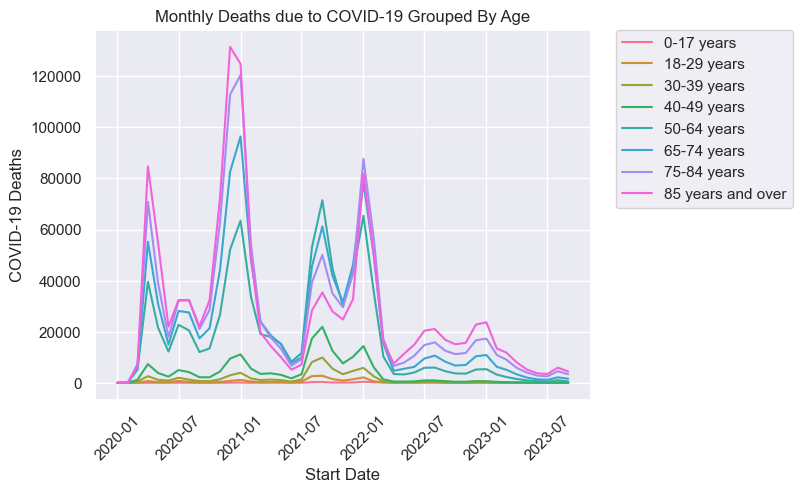

In [55]:
sns.set(rc={'axes.grid': True})
sns.set_palette("plasma")
# line_graphs_monthly_deaths(month_age_df)
mask = month_age_df["Age Group"].isin(["0-17 years", "18-29 years", "30-39 years","40-49 years",
                                       "50-64 years",'65-74 years', '75-84 years', '85 years and over'])
    
    # Apply the mask to the DataFrame to filter out the rows
detailed_monthly = month_age_df[mask]
plt.title("Monthly Deaths due to COVID-19 Grouped By Age")
hue_order = ["0-17 years", "18-29 years", "30-39 years","40-49 years",\
             "50-64 years",'65-74 years', '75-84 years', '85 years and over']
sns.lineplot(x='Start Date', y='COVID-19 Deaths', data=detailed_monthly, hue = "Age Group", hue_order=hue_order)
plt.gca().set_xticklabels(plt.gca().get_xticklabels(), rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()

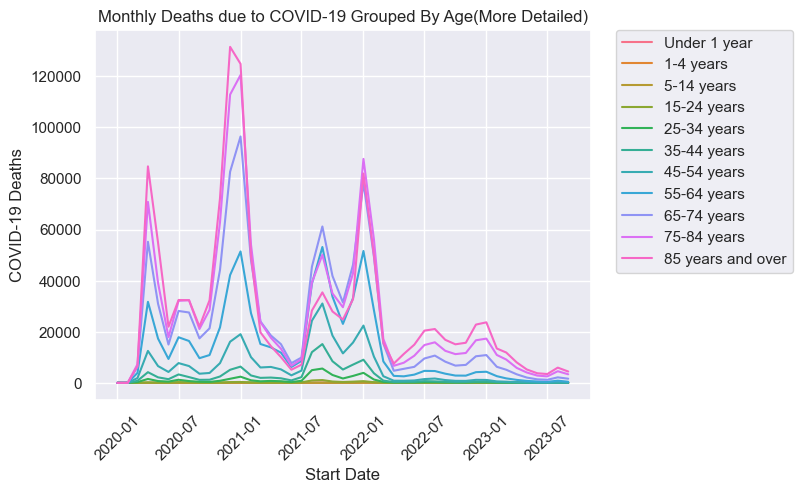

In [56]:
sns.set(rc={'axes.grid': True})
sns.set_palette("plasma")
# line_graphs_monthly_deaths(month_age_df)
mask = ~month_age_df["Age Group"].isin(["0-17 years", "18-29 years", "30-39 years","40-49 years","50-64 years", "All Ages"])
    
    # Apply the mask to the DataFrame to filter out the rows
detailed_monthly = month_age_df[mask]
plt.title("Monthly Deaths due to COVID-19 Grouped By Age(More Detailed)")
hue_order = ["Under 1 year","1-4 years", "5-14 years", "15-24 years","25-34 years","35-44 years"
                                       ,"45-54 years", "55-64 years",'65-74 years', '75-84 years', '85 years and over']
sns.lineplot(x='Start Date', y='COVID-19 Deaths', data=detailed_monthly, hue = "Age Group", hue_order=hue_order)
plt.gca().set_xticklabels(plt.gca().get_xticklabels(), rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()


In [57]:
month_sex_df = month_df.groupby(['Sex', 'Start Date'])['COVID-19 Deaths'].sum().reset_index()
year_sex_df = year_df.groupby(['Sex', 'Start Date'])['COVID-19 Deaths'].sum().reset_index()
total_sex_df = total_df.groupby(['Sex', 'Start Date'])['COVID-19 Deaths'].sum().reset_index()


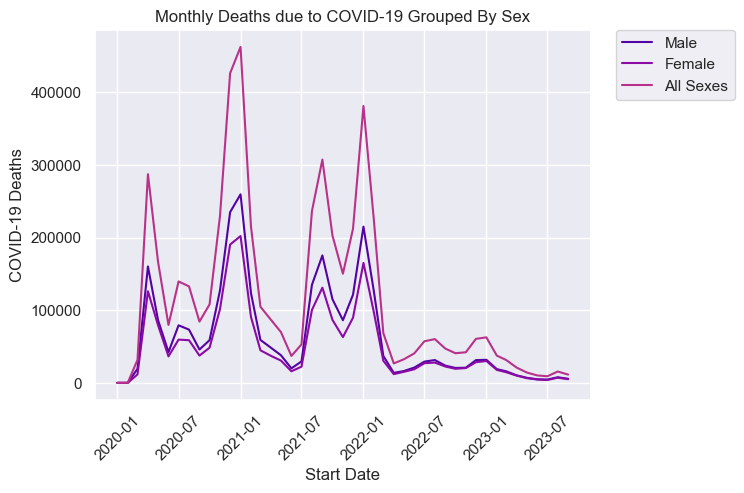

In [58]:
sns.set(rc={'axes.grid': True})
sns.set_palette("plasma")
# line_graphs_monthly_deaths(month_age_df)
mask = month_sex_df["Sex"].isin(["Male","Female","All Sexes"])
    
    # Apply the mask to the DataFrame to filter out the rows
detailed_monthly = month_sex_df[mask]
plt.title("Monthly Deaths due to COVID-19 Grouped By Sex")
hue_order = ["Male","Female","All Sexes"]
sns.lineplot(x='Start Date', y='COVID-19 Deaths', data=detailed_monthly, hue = "Sex", hue_order=hue_order)
plt.gca().set_xticklabels(plt.gca().get_xticklabels(), rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()

## Machine Learning Analysis 
The goal of this project was 2 fold. First was to understand how COVID-19 effected each demographic. The second is determining and constructing a model that would be able to help predict future deaths rates due to COVID-19. In this portion of the notebook, we will use machine learning to accomplish predicting future death rates. Since the data at hand is time-series, we used both ARMA and ARIMA models to attempt to benchmark future deaths. Since monthly death rates had the most detailed breakdown of COVID-19 deaths, we used monthly deaths for each demographic. 

The features for the model was broken down demographic, the month, and the death toll for each respective demographic that month. Because of the detail of the breakdown, we used the more detailed age demographic datebase as our data. We used the first 40 months of the pandemic training data. The testing set was the last recorded 5 months of the pandemic(March 2023-September 2023). The output of the model is the estimated death toll for the next X months of the pandemic for each demographic. Below are the results of the predictions for both the ARMA and ARIMA models

In [92]:
#creating models
predictions = ["Under 1 year","1-4 years", "5-14 years", "15-24 years","25-34 years","35-44 years"
                ,"45-54 years", "55-64 years","65-74 years","75-84 years","85 years and over","All Ages"]
models = []
# from statsmodels.tsa.arima.model import ARIMA
for prediction in predictions:
    mask = month_age_df["Age Group"].isin([prediction])
    # Assuming month_age_df and mask are defined elsewhere in your code
    basic_month = month_age_df[mask]
    basic_month.dtypes
    basic_month = basic_month.drop(['Age Group'], axis=1)
    basic_month.set_index('Start Date', inplace=True)

    # Fit the first ARIMA model
    model = ARIMA(basic_month[0:40], order=(4, 1, 0))
    model_fit = model.fit()
    models.append(model_fit)

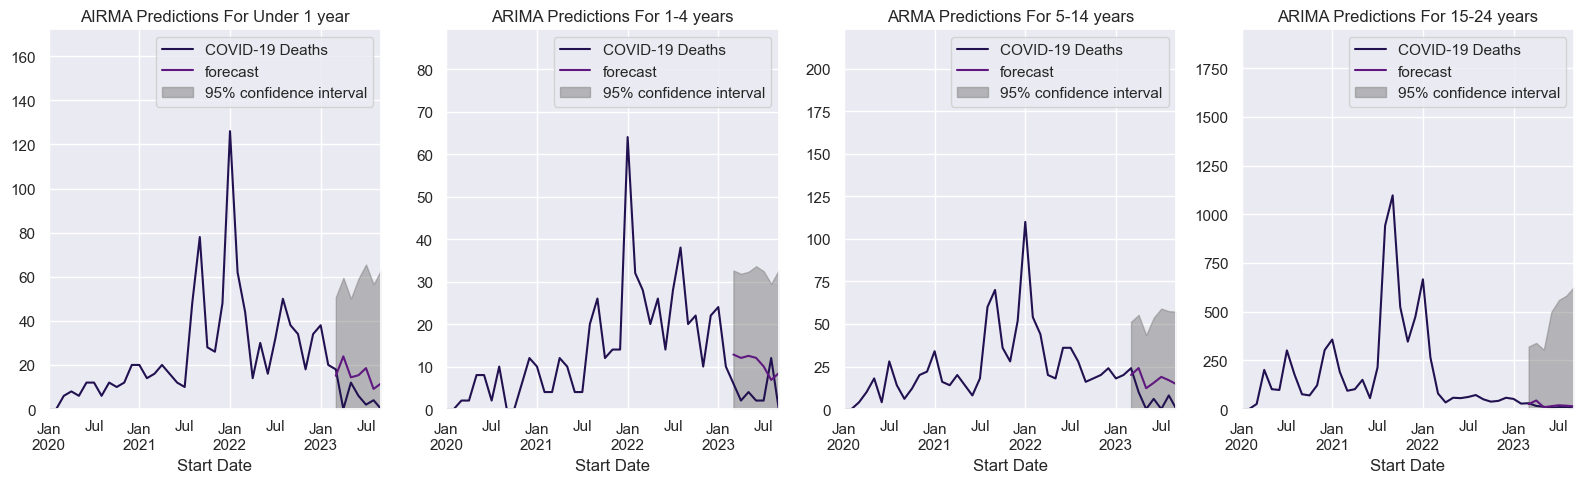

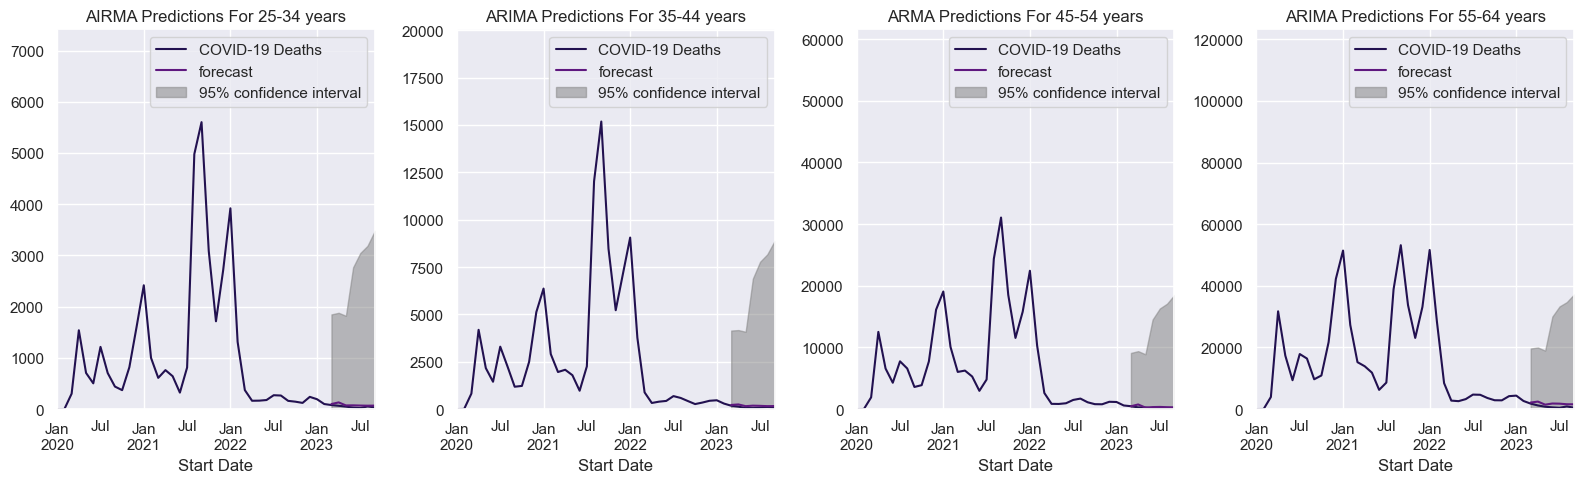

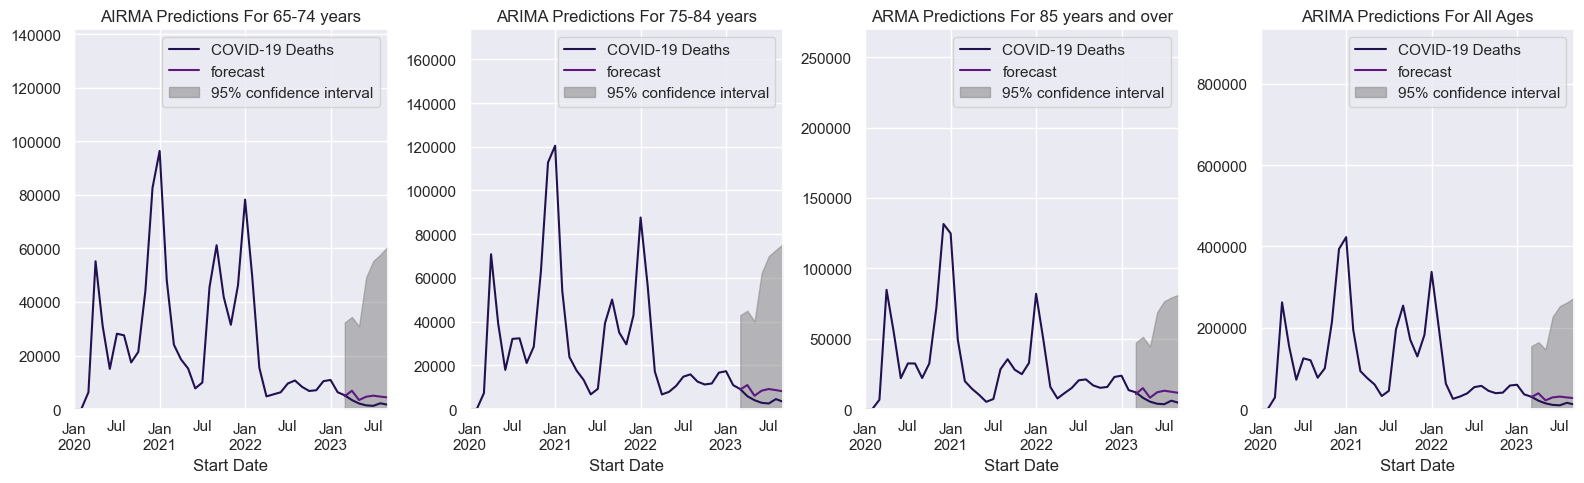

In [97]:
graph_results(models,month_age_df)

## Machine Learning Results
The graphs above show both the ARMA and ARIMA forecasts for a given time period. The ARMA model performed alright for younger demographics, but became perpetually more unstable as the age group went up and began to perform more poorly. ARIMA was a much needed improvement, and literally performed magnitudes better than ARMA the higher the age group.

Given the combination of EDA and the high performance of ARIMA in predicting death rates, it can be concluded that death rates due to COVID-19 are heavily correlated with age demographic. 

Sources

https://www.cdc.gov/vaccines/covid-19/clinical-considerations/myocarditis.html#:~:text=Though%20cases%20of%20myocarditis%20and,age%20groups%2C%20and%20after%20other 
https://www2.census.gov/library/publications/decennial/2020/census-briefs/c2020br-06.pdf